In [1]:
import pandas as pd
import re

In [2]:
train = pd.read_csv('./resalecar/dataset/train.csv')
test = pd.read_csv('./resalecar/dataset/test.csv')
sample_submission = pd.read_csv('./resalecar/dataset/sample_submission.csv')

In [3]:
train.head()

,id,title,odometer,location,isimported,engine,transmission,fuel,paint,year,target
0,0,Toyota RAV 4,18277,Lagos,Foreign Used,4-cylinder(I4),automatic,petrol,Red,2016,13665000
1,1,Toyota Land Cruiser,10,Lagos,New,4-cylinder(I4),automatic,petrol,Black,2019,33015000
2,2,Land Rover Range Rover Evoque,83091,Lagos,Foreign Used,6-cylinder(V6),automatic,petrol,Red,2012,9915000
3,3,Lexus ES 350,91524,Lagos,Foreign Used,4-cylinder(I4),automatic,petrol,Gray,2007,3815000
4,4,Toyota Venza,94177,Lagos,Foreign Used,6-cylinder(V6),automatic,petrol,Red,2010,7385000


In [4]:
test.head()

,id,title,odometer,location,isimported,engine,transmission,fuel,paint,year
0,0,Mercedes-Benz C 300,1234,Abuja,New,4-cylinder(I4),automatic,petrol,White,2017
1,1,Honda Accord,29938,Abuja,Foreign Used,4-cylinder(I4),automatic,petrol,White,2013
2,2,Mercedes-Benz S 550,87501,Lagos,Foreign Used,4-cylinder(I4),automatic,petrol,Black,2012
3,3,Toyota Sienna,180894,Lagos,Locally used,6-cylinder(V6),automatic,petrol,Dark Grey,2001
4,4,Toyota Hiace,104814,Lagos,Foreign Used,4-cylinder(I4),automatic,petrol,White,2000


In [5]:
# sorted(train.title.unique())

In [6]:
# sorted(test.title.unique())

In [7]:
only_train_data_title = set(train.title.unique())-set(test.title.unique())
only_test_data_title = set(test.title.unique())-set(train.title.unique())

In [8]:
'train에만 있는 차종류 개수 : {}, test에만 있는 차종류 개수 : {}'.format(len(only_train_data_title), len(only_test_data_title))

'train에만 있는 차종류 개수 : 116, test에만 있는 차종류 개수 : 37'

In [9]:
# only_train_data_title

In [10]:
# only_test_data_title

In [11]:
train['title'].apply(lambda x : x.split(" ")[0])

0       Toyota
1       Toyota
2         Land
3        Lexus
4       Toyota
         ...  
1010    Toyota
1011    Toyota
1012    Toyota
1013     Lexus
1014       DAF
Name: title, Length: 1015, dtype: object

In [12]:
train['brand'] = train['title'].apply(lambda x : x.split(" ")[0])
train.head()

,id,title,odometer,location,isimported,engine,transmission,fuel,paint,year,target,brand
0,0,Toyota RAV 4,18277,Lagos,Foreign Used,4-cylinder(I4),automatic,petrol,Red,2016,13665000,Toyota
1,1,Toyota Land Cruiser,10,Lagos,New,4-cylinder(I4),automatic,petrol,Black,2019,33015000,Toyota
2,2,Land Rover Range Rover Evoque,83091,Lagos,Foreign Used,6-cylinder(V6),automatic,petrol,Red,2012,9915000,Land
3,3,Lexus ES 350,91524,Lagos,Foreign Used,4-cylinder(I4),automatic,petrol,Gray,2007,3815000,Lexus
4,4,Toyota Venza,94177,Lagos,Foreign Used,6-cylinder(V6),automatic,petrol,Red,2010,7385000,Toyota


In [13]:
train.replace({'brand' : {'Land' : 'Land Rover'}}, inplace = True)

In [14]:
train.head()

,id,title,odometer,location,isimported,engine,transmission,fuel,paint,year,target,brand
0,0,Toyota RAV 4,18277,Lagos,Foreign Used,4-cylinder(I4),automatic,petrol,Red,2016,13665000,Toyota
1,1,Toyota Land Cruiser,10,Lagos,New,4-cylinder(I4),automatic,petrol,Black,2019,33015000,Toyota
2,2,Land Rover Range Rover Evoque,83091,Lagos,Foreign Used,6-cylinder(V6),automatic,petrol,Red,2012,9915000,Land Rover
3,3,Lexus ES 350,91524,Lagos,Foreign Used,4-cylinder(I4),automatic,petrol,Gray,2007,3815000,Lexus
4,4,Toyota Venza,94177,Lagos,Foreign Used,6-cylinder(V6),automatic,petrol,Red,2010,7385000,Toyota


In [15]:
len(train['brand'].unique())

42

In [16]:
train['brand'] = train['brand'].replace({'Mercedes-Benz/52' : 'Mercedes-Benz'})

In [17]:
# 브랜드에서 이상한 오타는 없음.
print(len(train['brand'].unique()))
print(sorted(train['brand'].unique()))

41
['ALPINA', 'Acura', 'Audi', 'BMW', 'Bentley', 'Chevrolet', 'DAF', 'Dodge', 'Ford', 'GAC', 'GMC', 'Honda', 'Hyundai', 'IVECO', 'IVM', 'Infiniti', 'Isuzu', 'Iveco', 'JMC', 'Jaguar', 'Jeep', 'Kia', 'Land Rover', 'Lexus', 'Lincoln', 'MAN-VOLKSWAGEN', 'MINI', 'Mack', 'Man', 'Mazda', 'Mercedes-Benz', 'Mitsubishi', 'Nissan', 'Peugeot', 'Pontiac', 'Porsche', 'Rolls-Royce', 'Scania', 'Toyota', 'Volkswagen', 'Volvo']


In [18]:
test['brand'] = test['title'].apply(lambda x: x.split(" ")[0])
test.head()

,id,title,odometer,location,isimported,engine,transmission,fuel,paint,year,brand
0,0,Mercedes-Benz C 300,1234,Abuja,New,4-cylinder(I4),automatic,petrol,White,2017,Mercedes-Benz
1,1,Honda Accord,29938,Abuja,Foreign Used,4-cylinder(I4),automatic,petrol,White,2013,Honda
2,2,Mercedes-Benz S 550,87501,Lagos,Foreign Used,4-cylinder(I4),automatic,petrol,Black,2012,Mercedes-Benz
3,3,Toyota Sienna,180894,Lagos,Locally used,6-cylinder(V6),automatic,petrol,Dark Grey,2001,Toyota
4,4,Toyota Hiace,104814,Lagos,Foreign Used,4-cylinder(I4),automatic,petrol,White,2000,Toyota


In [19]:
test['brand'].unique()

array(['Mercedes-Benz', 'Honda', 'Toyota', 'Iveco', 'Lexus', 'Nissan',
       'Volkswagen', 'Jeep', 'Ford', 'BMW', 'Mack', 'Land', 'Hyundai',
       'Peugeot', 'Volvo', 'Infiniti', 'Acura', 'Man', 'Fiat', 'MINI',
       'DAF', 'Mazda', 'Porsche', 'Mitsubishi', 'Chevrolet', 'Kia',
       'Pontiac', 'Rolls-Royce'], dtype=object)

In [20]:
test.replace({'brand' : {'Land' : 'Land Rover'}}, inplace = True)

In [21]:
sorted(test['brand'].unique())

['Acura',
 'BMW',
 'Chevrolet',
 'DAF',
 'Fiat',
 'Ford',
 'Honda',
 'Hyundai',
 'Infiniti',
 'Iveco',
 'Jeep',
 'Kia',
 'Land Rover',
 'Lexus',
 'MINI',
 'Mack',
 'Man',
 'Mazda',
 'Mercedes-Benz',
 'Mitsubishi',
 'Nissan',
 'Peugeot',
 'Pontiac',
 'Porsche',
 'Rolls-Royce',
 'Toyota',
 'Volkswagen',
 'Volvo']

In [22]:
# train이나 test의 종류는 모두 같지 않다.
print(len(train['brand'].unique()))
print(len(test['brand'].unique()))
print(sorted(train['brand'].unique()) == sorted(test['brand'].unique()))

41
28
False


In [23]:
# train에 없는데, test에 있는 brand
s = train['brand'].unique()
temp3 = [x for x in test['brand'].unique() if x not in s] #순서 보존됨
print(temp3)

# test 없는데, train 있는 brand
s = test['brand'].unique()
temp3 = [x for x in train['brand'].unique() if x not in s] #순서 보존됨
print(temp3)

['Fiat']
['Jaguar', 'Lincoln', 'Isuzu', 'IVM', 'Dodge', 'GMC', 'Scania', 'GAC', 'IVECO', 'MAN-VOLKSWAGEN', 'ALPINA', 'Bentley', 'JMC', 'Audi']


In [24]:
sorted(train.location.unique())

['Abia',
 'Abia State',
 'Abuja',
 'Abuja ',
 'Accra',
 'Adamawa ',
 'FCT',
 'Lagos',
 'Lagos ',
 'Lagos State',
 'Ogun',
 'Ogun State',
 'other']

In [25]:
# sorted(test.location.unique())

In [26]:
train['location'] = train['location'].str.replace(" State","")

In [27]:
train['location'] = train['location'].str.rstrip()

In [28]:
sorted(train.location.unique())

['Abia', 'Abuja', 'Accra', 'Adamawa', 'FCT', 'Lagos', 'Ogun', 'other']

In [29]:
test['location'] = test['location'].str.replace(" State","")
test['location'] = test['location'].str.replace(" state","")
test['location'] = test['location'].str.replace('Arepo ogun','Ogun')
test['location'] = test['location'].str.rstrip()

In [30]:
sorted(test['location'].unique())

['Abia', 'Abuja', 'Lagos', 'Mushin', 'Ogun', 'other']

In [31]:
sorted(train.isimported.unique())

['Foreign Used', 'Locally used', 'New ']

In [32]:
sorted(test.isimported.unique())

['Foreign Used', 'Locally used', 'New ']

In [33]:
sorted(train.engine.unique())

['2-cylinder(I2)',
 '3-cylinder(I3)',
 '4-cylinder(H4)',
 '4-cylinder(I4)',
 '5-cylinder(I5)',
 '6-cylinder(I6)',
 '6-cylinder(V6)',
 '8-cylinder(V8)']

In [34]:
sorted(test.engine.unique())

['12-cylinder(V12)',
 '2-cylinder(I2)',
 '3-cylinder(I3)',
 '4-cylinder(I4)',
 '5-cylinder(I5)',
 '6-cylinder(I6)',
 '6-cylinder(V6)',
 '8-cylinder(V8)']

In [35]:
train.transmission.unique()

array(['automatic', 'manual'], dtype=object)

In [36]:
test.transmission.unique()

array(['automatic', 'manual'], dtype=object)

In [37]:
train.fuel.unique()

array(['petrol', 'diesel'], dtype=object)

In [38]:
test.fuel.unique()

array(['petrol', 'diesel'], dtype=object)

In [39]:
sorted(train.paint.unique())

[' Black',
 ' Black/Red',
 'Ash',
 'Ash and black',
 'BLACK',
 'Beige',
 'Black',
 'Black ',
 'Black and silver',
 'Black sand pearl',
 'Black.',
 'Blue',
 'Blue ',
 'Brown',
 'Cream',
 'Cream ',
 'DARK GREY',
 'Dark Ash',
 'Dark Blue',
 'Dark Green',
 'Dark Grey',
 'Dark ash',
 'Dark blue ',
 'Dark gray',
 'Dark silver ',
 'Deep Blue',
 'Deep blue',
 'GOLD',
 'Gery',
 'Gold',
 'Gold ',
 'Gray',
 'Gray ',
 'Green',
 'Green ',
 'Grey',
 'Grey ',
 'Ink blue',
 'Light Gold',
 'Light blue',
 'Light silver ',
 'Magnetic Gray',
 'Magnetic Gray Metallic',
 'Maroon',
 'Midnight Black Metal',
 'Milk',
 'Navy blue',
 'Off white',
 'Off white l',
 'Pale brown',
 'Purple',
 'Red',
 'Redl',
 'SILVER',
 'Silver',
 'Silver ',
 'Silver/grey',
 'Sky blue',
 'Skye blue',
 'Sliver',
 'Super White',
 'WHITE',
 'WINE',
 'Whine ',
 'White',
 'White ',
 'White orchild pearl',
 'Wine',
 'Yellow',
 'blue',
 'green',
 'orange',
 'red',
 'white',
 'white-blue',
 'yellow']

In [40]:
import re 

def clean_text(texts): 
    corpus = [] 
    for i in range(0, len(texts)): 
        review = re.sub(r'[@%\\*=()/~#&\+á?\xc3\xa1\-\|\.\:\;\!\-\,\_\~\$\'\"\n\]\[\>\<]', '',texts[i]) #@%*=()/+ 와 같은 문장부호 제거
        review = re.sub(r'\d+','',review)#숫자 제거
        review = review.lower() #소문자 변환
        review = re.sub(r'\s+', ' ', review) #extra space 제거
        review = re.sub(r'<[^>]+>','',review) #Html tags 제거
        review = re.sub(r'\s+', ' ', review) #spaces 제거
        review = re.sub(r"^\s+", '', review) #space from start 제거
        review = re.sub(r'\s+$', '', review) #space from the end 제거
        review = re.sub(r'_', ' ', review) #space from the end 제거
        #review = re.sub(r'l', '', review)
        corpus.append(review) 
        
    return corpus

temp = clean_text(train['paint']) #메소드 적용
train['paint'] = temp
print('train data에서 paint의 unique 카테고리 개수 : ', len(train['paint'].unique()))

train data에서 paint의 unique 카테고리 개수 :  51


In [41]:
sorted(train['paint'].unique())

['ash',
 'ash and black',
 'beige',
 'black',
 'black and silver',
 'black sand pearl',
 'blackred',
 'blue',
 'brown',
 'cream',
 'dark ash',
 'dark blue',
 'dark gray',
 'dark green',
 'dark grey',
 'dark silver',
 'deep blue',
 'gery',
 'gold',
 'gray',
 'green',
 'grey',
 'ink blue',
 'light blue',
 'light gold',
 'light silver',
 'magnetic gray',
 'magnetic gray metallic',
 'maroon',
 'midnight black metal',
 'milk',
 'navy blue',
 'off white',
 'off white l',
 'orange',
 'pale brown',
 'purple',
 'red',
 'redl',
 'silver',
 'silvergrey',
 'sky blue',
 'skye blue',
 'sliver',
 'super white',
 'whine',
 'white',
 'white orchild pearl',
 'whiteblue',
 'wine',
 'yellow']

In [42]:
train['paint'] = train['paint'] = train['paint'].apply(lambda x : 'blue' if x.find('blue') >= 0 else x)
train['paint'] = train['paint'] = train['paint'].apply(lambda x : 'red' if x.find('red') >= 0 else x)
train['paint'] = train['paint'] = train['paint'].apply(lambda x : 'green' if x.find('green') >= 0 else x)
train['paint'] = train['paint'] = train['paint'].apply(lambda x : 'white' if x.find('white') >= 0 else x)
train['paint'] = train['paint'] = train['paint'].apply(lambda x : 'grey' if x.find('grey') >= 0 else x)
train['paint'] = train['paint'] = train['paint'].apply(lambda x : 'grey' if x.find('gery') >= 0 else x)
train['paint'] = train['paint'] = train['paint'].apply(lambda x : 'grey' if x.find('gray') >= 0 else x)
train['paint'] = train['paint'] = train['paint'].apply(lambda x : 'ash' if x.find('ash') >= 0 else x)
train['paint'] = train['paint'] = train['paint'].apply(lambda x : 'brown' if x.find('brown') >= 0 else x)
train['paint'] = train['paint'] = train['paint'].apply(lambda x : 'silver' if x.find('silver') >= 0 else x)
train['paint'] = train['paint'] = train['paint'].apply(lambda x : 'silver' if x.find('sliver') >= 0 else x)
train['paint'] = train['paint'] = train['paint'].apply(lambda x : 'black' if x.find('black') >= 0 else x)
train['paint'] = train['paint'] = train['paint'].apply(lambda x : 'gold' if x.find('gold') >= 0 else x)
train['paint'] = train['paint'] = train['paint'].apply(lambda x : 'wine' if x.find('whine') >= 0 else x)
train['paint'] = train['paint'] = train['paint'].apply(lambda x : 'black' if x.find('blac') >= 0 else x)
train['paint'] = train['paint'] = train['paint'].apply(lambda x : 'gold' if x.find('golf') >= 0 else x)

In [43]:
sorted(train['paint'].unique())

['ash',
 'beige',
 'black',
 'blue',
 'brown',
 'cream',
 'gold',
 'green',
 'grey',
 'maroon',
 'milk',
 'orange',
 'purple',
 'red',
 'silver',
 'white',
 'wine',
 'yellow']

In [44]:
temp2 = clean_text(test['paint'])
test['paint'] = temp2
print('test data에서 paint의 unique 카테고리 개수 : ', len(test['paint'].unique()))

test data에서 paint의 unique 카테고리 개수 :  30


In [45]:

test['paint'] = test['paint'].apply(lambda x : 'blue' if x.find('blue') >= 0 else x)
test['paint'] = test['paint'].apply(lambda x : 'red' if x.find('red') >= 0 else x)
test['paint'] = test['paint'].apply(lambda x : 'green' if x.find('green') >= 0 else x)
test['paint'] = test['paint'].apply(lambda x : 'white' if x.find('white') >= 0 else x)
test['paint'] = test['paint'].apply(lambda x : 'grey' if x.find('grey') >= 0 else x)
test['paint'] = test['paint'].apply(lambda x : 'grey' if x.find('gery') >= 0 else x)
test['paint'] = test['paint'].apply(lambda x : 'grey' if x.find('gray') >= 0 else x)
test['paint'] = test['paint'].apply(lambda x : 'ash' if x.find('ash') >= 0 else x)
test['paint'] = test['paint'].apply(lambda x : 'brown' if x.find('brown') >= 0 else x)
test['paint'] = test['paint'].apply(lambda x : 'silver' if x.find('silver') >= 0 else x)
test['paint'] = test['paint'].apply(lambda x : 'silver' if x.find('sliver') >= 0 else x)
test['paint'] = test['paint'].apply(lambda x : 'black' if x.find('black') >= 0 else x)
test['paint'] = test['paint'].apply(lambda x : 'gold' if x.find('gold') >= 0 else x)
test['paint'] = test['paint'].apply(lambda x : 'wine' if x.find('whine') >= 0 else x)
test['paint'] = test['paint'].apply(lambda x : 'black' if x.find('blac') >= 0 else x)
test['paint'] = test['paint'].apply(lambda x : 'gold' if x.find('golf') >= 0 else x)

In [46]:
len(sorted(test['paint'].unique()))

16

In [47]:
train_year = set(train.year.unique()) - set(test.year.unique())
test_year = set(test.year.unique()) - set(train.year.unique())


In [48]:
train_year

{1217, 1218, 1980, 1982, 1985, 1991, 1995}

In [49]:
test_year

{1324, 1726, 1987, 1993, 2626}

## 자료 비교

In [50]:
def difference(column, df_train, df_test):
    print('---- {} ----'.format(column))
    # train에 없는데, test에 있는 column
    print('train 없는데, test 있는', column)
    s = df_train[column].unique()
    no_train = [x for x in df_test[column].unique() if x not in s] #순서 보존됨
    print(no_train)

    # test 없는데, train 있는 column
    print('test 없는데, train 있는', column)
    s = df_test[column].unique()
    no_test = [x for x in df_train[column].unique() if x not in s] #순서 보존됨
    print(no_test)

difference('brand', train, test)
difference('isimported', train, test)
difference('location', train, test)
difference('engine', train, test)
difference('transmission', train, test)
difference('fuel', train, test)
difference('paint', train, test)
difference('year', train, test)

---- brand ----
train 없는데, test 있는 brand
['Fiat']
test 없는데, train 있는 brand
['Jaguar', 'Lincoln', 'Isuzu', 'IVM', 'Dodge', 'GMC', 'Scania', 'GAC', 'IVECO', 'MAN-VOLKSWAGEN', 'ALPINA', 'Bentley', 'JMC', 'Audi']
---- isimported ----
train 없는데, test 있는 isimported
[]
test 없는데, train 있는 isimported
[]
---- location ----
train 없는데, test 있는 location
['Mushin']
test 없는데, train 있는 location
['FCT', 'Accra', 'Adamawa']
---- engine ----
train 없는데, test 있는 engine
['12-cylinder(V12)']
test 없는데, train 있는 engine
['4-cylinder(H4)']
---- transmission ----
train 없는데, test 있는 transmission
[]
test 없는데, train 있는 transmission
[]
---- fuel ----
train 없는데, test 있는 fuel
[]
test 없는데, train 있는 fuel
[]
---- paint ----
train 없는데, test 있는 paint
['indigo ink pearl']
test 없는데, train 있는 paint
['purple', 'milk', 'orange']
---- year ----
train 없는데, test 있는 year
[1993, 1987, 1324, 2626, 1726]
test 없는데, train 있는 year
[1995, 1985, 1991, 1218, 1982, 1217, 1980]


## 자료 경향 확인

,id,title,odometer,location,isimported,engine,transmission,fuel,paint,year,target,brand
0,0,Toyota RAV 4,18277,Lagos,Foreign Used,4-cylinder(I4),automatic,petrol,red,2016,13665000,Toyota
1,1,Toyota Land Cruiser,10,Lagos,New,4-cylinder(I4),automatic,petrol,black,2019,33015000,Toyota
2,2,Land Rover Range Rover Evoque,83091,Lagos,Foreign Used,6-cylinder(V6),automatic,petrol,red,2012,9915000,Land Rover
3,3,Lexus ES 350,91524,Lagos,Foreign Used,4-cylinder(I4),automatic,petrol,grey,2007,3815000,Lexus
4,4,Toyota Venza,94177,Lagos,Foreign Used,6-cylinder(V6),automatic,petrol,red,2010,7385000,Toyota
...,...,...,...,...,...,...,...,...,...,...,...,...
1010,1010,Toyota Corolla,46768,Lagos,Foreign Used,4-cylinder(I4),automatic,petrol,black,2014,5415000,Toyota
1011,1011,Toyota Camry,31600,Abuja,Foreign Used,4-cylinder(I4),automatic,petrol,silver,2011,3615000,Toyota
1012,1012,Toyota Camry,96802,Abuja,Foreign Used,4-cylinder(I4),automatic,petrol,black,2011,3415000,Toyota
1013,1013,Lexus GX 460,146275,Lagos,Foreign Used,6-cylinder(V6),automatic,petrol,gold,2013,14315000,Lexus


,id,odometer,year,target
id,1.000000,-0.017320,-0.017048,0.025104
odometer,-0.017320,1.000000,-0.220366,-0.261147
year,-0.017048,-0.220366,1.000000,-0.042637
target,0.025104,-0.261147,-0.042637,1.000000


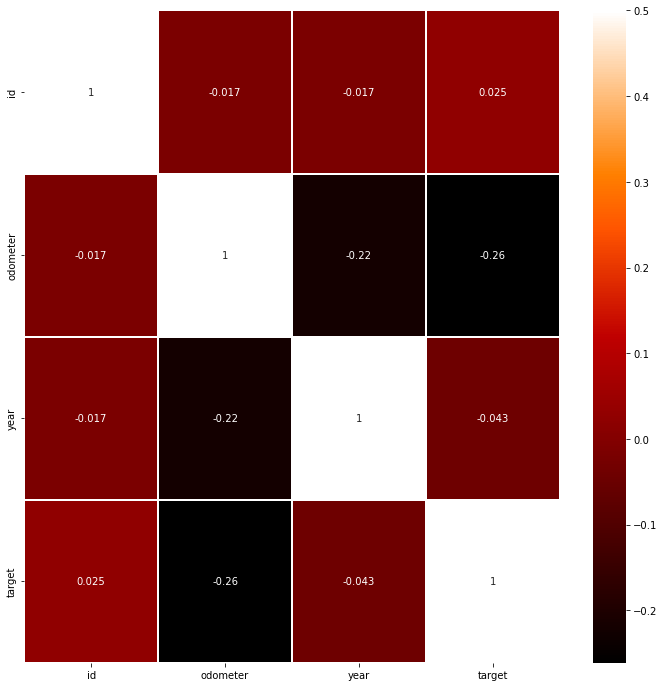

In [51]:
display(train)

import matplotlib.pyplot as plt
import seaborn as sns
# 분석을 위해 A와 B의 관계를 나타내는 콜레이션 매트릭스를 출력해본다.
# 1에 가까우면 양의 상관성, -1에 가까우면 음의 상관성이 있다고 한다.
display(train[:].corr())

# 히트맵으로 확인해본다.
plt.figure(figsize=(12,12))

sns.heatmap(train.corr(), linewidths=0.1, vmax=0.5, cmap=plt.cm.gist_heat,
            linecolor='white', annot=True)
plt.show()

## 자료 가공

In [52]:
set(train.brand) | set(test.brand) # 합집합

{'ALPINA',
 'Acura',
 'Audi',
 'BMW',
 'Bentley',
 'Chevrolet',
 'DAF',
 'Dodge',
 'Fiat',
 'Ford',
 'GAC',
 'GMC',
 'Honda',
 'Hyundai',
 'IVECO',
 'IVM',
 'Infiniti',
 'Isuzu',
 'Iveco',
 'JMC',
 'Jaguar',
 'Jeep',
 'Kia',
 'Land Rover',
 'Lexus',
 'Lincoln',
 'MAN-VOLKSWAGEN',
 'MINI',
 'Mack',
 'Man',
 'Mazda',
 'Mercedes-Benz',
 'Mitsubishi',
 'Nissan',
 'Peugeot',
 'Pontiac',
 'Porsche',
 'Rolls-Royce',
 'Scania',
 'Toyota',
 'Volkswagen',
 'Volvo'}

In [53]:
brand_label = {_brand : label for label, _brand in enumerate(set(set(train.brand)|set(test.brand)))}
brand_label
# set 집합은 순서가 없음

{'BMW': 0,
 'Volvo': 1,
 'IVM': 2,
 'Peugeot': 3,
 'Mack': 4,
 'Isuzu': 5,
 'ALPINA': 6,
 'Infiniti': 7,
 'GMC': 8,
 'Honda': 9,
 'Rolls-Royce': 10,
 'Hyundai': 11,
 'IVECO': 12,
 'MINI': 13,
 'Scania': 14,
 'Lexus': 15,
 'Mercedes-Benz': 16,
 'Audi': 17,
 'Kia': 18,
 'DAF': 19,
 'MAN-VOLKSWAGEN': 20,
 'Nissan': 21,
 'Bentley': 22,
 'Acura': 23,
 'Jeep': 24,
 'Mitsubishi': 25,
 'Jaguar': 26,
 'Land Rover': 27,
 'Iveco': 28,
 'Volkswagen': 29,
 'Fiat': 30,
 'Porsche': 31,
 'Man': 32,
 'Mazda': 33,
 'Dodge': 34,
 'Lincoln': 35,
 'JMC': 36,
 'Ford': 37,
 'GAC': 38,
 'Toyota': 39,
 'Chevrolet': 40,
 'Pontiac': 41}

In [54]:
train['brand'] = train['brand'].replace(brand_label)
test['brand'] = test['brand'].replace(brand_label)

In [55]:
train['brand'].unique()

array([39, 27, 15, 41, 37,  9,  1,  0,  7, 16, 11, 26, 25, 21,  4, 40, 33,
       35, 18, 29, 23, 19, 32,  5,  2, 31, 13, 34,  8, 28, 14, 38, 12,  3,
       10, 20, 24,  6, 22, 36, 17], dtype=int64)

In [56]:
test['brand']

0      16
1       9
2      16
3      39
4      39
       ..
431    16
432     9
433    16
434    15
435    39
Name: brand, Length: 436, dtype: int64

In [57]:
train['brand']

0       39
1       39
2       27
3       15
4       39
        ..
1010    39
1011    39
1012    39
1013    15
1014    19
Name: brand, Length: 1015, dtype: int64

In [58]:
car_title = pd.concat([train.title, test.title], ignore_index = True)
car_title = set(car_title)
car_title

{'ALPINA B3',
 'Acura MDX',
 'Acura RDX',
 'Acura TL',
 'Acura TSX',
 'Acura ZDX',
 'Audi S6',
 'BMW 325',
 'BMW 335',
 'BMW 525',
 'BMW 528',
 'BMW 535',
 'BMW 730',
 'BMW 740',
 'BMW 745',
 'BMW 750',
 'BMW X3',
 'BMW X6',
 'Bentley Arnage',
 'Chevrolet Camaro',
 'Chevrolet Evanda',
 'Chevrolet Traverse',
 'DAF 45',
 'DAF 95XF TRACTOR HEAD',
 'DAF CF',
 'DAF FA 55. 180',
 'DAF XF TRACTOR HEAD',
 'Dodge Charger',
 'Fiat Ducato',
 'Ford Edge',
 'Ford Escape',
 'Ford Expedition',
 'Ford Explorer',
 'Ford F 150',
 'Ford Focus',
 'Ford Fusion',
 'Ford Mondeo',
 'Ford Mustang',
 'Ford TRANSIT PICKUP',
 'Ford Transit',
 'GAC Gonow Other',
 'GMC Terrain',
 'Honda Accord',
 'Honda CR-V',
 'Honda Civic',
 'Honda Crosstour',
 'Honda Element',
 'Honda Fit',
 'Honda Insight',
 'Honda Odyssey',
 'Honda Pilot',
 'Honda Ridgeline',
 'Hyundai Azera',
 'Hyundai Elantra',
 'Hyundai Santa Fe',
 'Hyundai Sonata',
 'Hyundai Tucson',
 'Hyundai ix35',
 'IVECO EUROTECH 7.50E-16',
 'IVM LT35',
 'Infiniti FX',

In [59]:
car_title_label = {car_title : label for label, car_title in enumerate(car_title)}
car_title_label

{'Jaguar X-Type': 0,
 'Kia Cerato': 1,
 'Mack CXN613 CAB BEHIND ENGINE': 2,
 'Honda CR-V': 3,
 'Lexus LX 570': 4,
 'Mitsubishi Galant': 5,
 'BMW 525': 6,
 'Toyota Sienna': 7,
 'Nissan Pathfinder': 8,
 'Mercedes-Benz SL 400': 9,
 'Iveco EUROCARGO 120e18': 10,
 'Toyota RAV 4': 11,
 'Ford Explorer': 12,
 'Jaguar XJ8': 13,
 'Lexus GX 460': 14,
 'Mercedes-Benz 220': 15,
 'Mercedes-Benz WATER TANKER': 16,
 'Scania P94 FLATBED': 17,
 'Toyota Land Cruiser': 18,
 'Mazda CX-9': 19,
 'Toyota Tacoma': 20,
 'Dodge Charger': 21,
 'Toyota Coaster': 22,
 'Mack CH613': 23,
 'Nissan Quest': 24,
 'DAF 45': 25,
 'BMW 325': 26,
 'Peugeot 307': 27,
 'Ford Fusion': 28,
 'MAN-VOLKSWAGEN FLATBED': 29,
 'Man Truck 18.44': 30,
 'Infiniti FX': 31,
 'DAF CF': 32,
 'Acura MDX': 33,
 'Honda Crosstour': 34,
 'Mercedes-Benz 350': 35,
 'Honda Element': 36,
 'Mercedes-Benz ATEGO': 37,
 'Nissan A': 38,
 'Toyota Matrix': 39,
 'Kia Soul': 40,
 'Isuzu CABSTER': 41,
 'Mercedes-Benz GLE 43 AMG': 42,
 'Ford F 150': 43,
 'Peuge

In [60]:
train['title'] = train['title'].replace(car_title_label)
test['title'] = test['title'].replace(car_title_label)

In [61]:
train.head(5)

,id,title,odometer,location,isimported,engine,transmission,fuel,paint,year,target,brand
0,0,11,18277,Lagos,Foreign Used,4-cylinder(I4),automatic,petrol,red,2016,13665000,39
1,1,18,10,Lagos,New,4-cylinder(I4),automatic,petrol,black,2019,33015000,39
2,2,107,83091,Lagos,Foreign Used,6-cylinder(V6),automatic,petrol,red,2012,9915000,27
3,3,94,91524,Lagos,Foreign Used,4-cylinder(I4),automatic,petrol,grey,2007,3815000,15
4,4,214,94177,Lagos,Foreign Used,6-cylinder(V6),automatic,petrol,red,2010,7385000,39


In [62]:
test.head(1)

,id,title,odometer,location,isimported,engine,transmission,fuel,paint,year,brand
0,0,189,1234,Abuja,New,4-cylinder(I4),automatic,petrol,white,2017,16


In [63]:
train.location.unique()

array(['Lagos', 'Abuja', 'Ogun', 'FCT', 'Accra', 'other', 'Abia',
       'Adamawa'], dtype=object)

In [64]:
test.location.unique()

array(['Abuja', 'Lagos', 'Ogun', 'Mushin', 'other', 'Abia'], dtype=object)

In [65]:
# Mushin은 Loagos와 연관있는 곳
test['location'] = test['location'].str.replace('Mushin', 'Lagos') 

In [66]:
test.location.unique()

array(['Abuja', 'Lagos', 'Ogun', 'other', 'Abia'], dtype=object)

In [67]:
location_label = set(train.location) | set(test.location) # 합집합
print(location_label)

{'Adamawa', 'Lagos', 'Accra', 'Abuja', 'FCT', 'Ogun', 'other', 'Abia'}


In [68]:
location_label = {_location : label for label, _location in enumerate(set(pd.concat([train.location, test.location])))}

train['location'] = train['location'].replace(location_label)
test['location'] = test['location'].replace(location_label)

In [69]:
location_label

{'Adamawa': 0,
 'Lagos': 1,
 'Accra': 2,
 'Abuja': 3,
 'FCT': 4,
 'Ogun': 5,
 'other': 6,
 'Abia': 7}

In [70]:
print(len(train['paint'].unique()))
len(test['paint'].unique())

18


16

In [71]:
paint_label = {_paint : label for label, _paint in enumerate(set(pd.concat([train.paint, test.paint])))}

In [72]:
paint_label

{'silver': 0,
 'white': 1,
 'cream': 2,
 'brown': 3,
 'beige': 4,
 'gold': 5,
 'blue': 6,
 'black': 7,
 'wine': 8,
 'green': 9,
 'ash': 10,
 'red': 11,
 'indigo ink pearl': 12,
 'yellow': 13,
 'purple': 14,
 'grey': 15,
 'milk': 16,
 'orange': 17,
 'maroon': 18}

In [73]:
train['paint'] = train['paint'].replace(paint_label)
test['paint'] = test['paint'].replace(paint_label)

In [74]:
set(set(train.engine.unique()) | set(test.engine.unique())) - set(set(train.engine.unique()) & set(test.engine.unique()))

{'12-cylinder(V12)', '4-cylinder(H4)'}

In [75]:
train[train.engine == '4-cylinder(H4)']

,id,title,odometer,location,isimported,engine,transmission,fuel,paint,year,target,brand
327,327,159,3656,3,Foreign Used,4-cylinder(H4),automatic,petrol,0,2020,20015000,39
830,830,148,152229,1,Foreign Used,4-cylinder(H4),automatic,petrol,15,2007,2765000,9


In [76]:
train = train.replace({'4-cylinder(H4)' : '4-cylinder(I4)'})

In [77]:
test[test.engine == '12-cylinder(V12)']

,id,title,odometer,location,isimported,engine,transmission,fuel,paint,year,brand
142,142,144,6758,1,New,12-cylinder(V12),automatic,petrol,7,2019,16


In [78]:
test = test.replace({'12-cylinder(V12)' : '8-cylinder(V8)'})

In [79]:
test.iloc[[142]]

,id,title,odometer,location,isimported,engine,transmission,fuel,paint,year,brand
142,142,144,6758,1,New,8-cylinder(V8),automatic,petrol,7,2019,16


In [80]:
engine_label = {_engine : label for label, _engine in enumerate(set(pd.concat([train.engine, test.engine])))}
engine_label

{'2-cylinder(I2)': 0,
 '6-cylinder(I6)': 1,
 '8-cylinder(V8)': 2,
 '4-cylinder(I4)': 3,
 '3-cylinder(I3)': 4,
 '6-cylinder(V6)': 5,
 '5-cylinder(I5)': 6}

In [81]:
train = train.replace(engine_label)
test = test.replace(engine_label)

In [82]:
train['year'] = train['year'].replace([1218, 1217], [2010, 2010])
test['year'] = test['year'].replace([1324, 1726, 2626], [2010, 2010, 2020])

In [83]:
isimported_label = {'Foreign Used': 0, 'Locally used' : 1, 'New ' : 2}
transmission_label = {'automatic' : 0, 'manual' : 1}
fuel_label = {'petrol' : 0, 'diesel' : 1}

In [84]:
train['isimported'] = train['isimported'].replace(isimported_label)
test['isimported'] = test['isimported'].replace(isimported_label)

train['transmission'] = train['transmission'].replace(transmission_label)
test['transmission'] = test['transmission'].replace(transmission_label)

train['fuel'] = train['fuel'].replace(fuel_label)
test['fuel'] = test['fuel'].replace(fuel_label)

## 추가 컬럼

,id,title,odometer,location,isimported,engine,transmission,fuel,paint,year,target,brand
id,1.000000,0.006999,-0.017320,-0.024531,0.003261,0.016092,-0.021177,-0.002189,0.007183,0.000323,0.025104,0.008032
title,0.006999,1.000000,0.001348,-0.006907,-0.028155,-0.065017,-0.009793,0.021973,-0.030550,-0.036499,-0.113994,-0.126013
odometer,-0.017320,0.001348,1.000000,-0.031760,0.147480,0.109722,0.295716,0.305862,-0.020927,-0.504128,-0.261147,-0.029251
location,-0.024531,-0.006907,-0.031760,1.000000,0.059887,-0.037910,-0.062064,-0.093083,-0.013342,-0.020344,-0.076355,0.030744
isimported,0.003261,-0.028155,0.147480,0.059887,1.000000,0.070356,0.277265,0.276686,-0.055445,-0.235053,0.067681,-0.147339
engine,0.016092,-0.065017,0.109722,-0.037910,0.070356,1.000000,0.084416,0.096109,-0.019472,-0.079147,-0.051052,0.037164
transmission,-0.021177,-0.009793,0.295716,-0.062064,0.277265,0.084416,1.000000,0.902001,-0.130752,-0.368940,-0.005705,-0.154881
fuel,-0.002189,0.021973,0.305862,-0.093083,0.276686,0.096109,0.902001,1.000000,-0.138982,-0.350055,0.006340,-0.160469
paint,0.007183,-0.030550,-0.020927,-0.013342,-0.055445,-0.019472,-0.130752,-0.138982,1.000000,0.038547,-0.003058,0.065653
year,0.000323,-0.036499,-0.504128,-0.020344,-0.235053,-0.079147,-0.368940,-0.350055,0.038547,1.000000,0.461563,0.057171


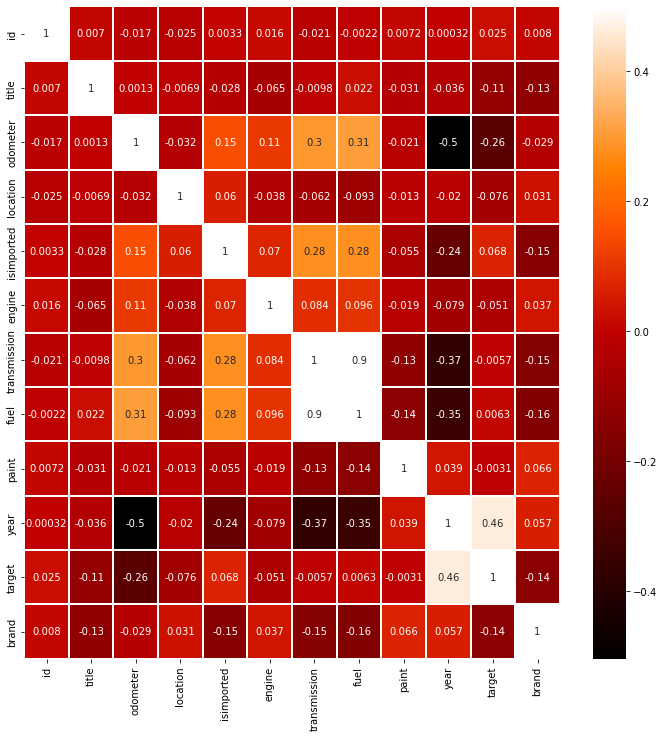

In [85]:
import matplotlib.pyplot as plt
import seaborn as sns
# 분석을 위해 A와 B의 관계를 나타내는 콜레이션 매트릭스를 출력해본다.
# 1에 가까우면 양의 상관성, -1에 가까우면 음의 상관성이 있다고 한다.
display(train[:].corr())

# 히트맵으로 확인해본다.
plt.figure(figsize=(12,12))

sns.heatmap(train.corr(), linewidths=0.1, vmax=0.5, cmap=plt.cm.gist_heat,
            linecolor='white', annot=True)
plt.show()

## 데이터 변환 최종 점검

In [86]:
# object가 나오면 안된다. 모두 정수형, float형이어야 한다.
display(train.head())
train.info()

,id,title,odometer,location,isimported,engine,transmission,fuel,paint,year,target,brand
0,0,11,18277,1,0,3,0,0,11,2016,13665000,39
1,1,18,10,1,2,3,0,0,7,2019,33015000,39
2,2,107,83091,1,0,5,0,0,11,2012,9915000,27
3,3,94,91524,1,0,3,0,0,15,2007,3815000,15
4,4,214,94177,1,0,5,0,0,11,2010,7385000,39


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1015 entries, 0 to 1014
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype
---  ------        --------------  -----
 0   id            1015 non-null   int64
 1   title         1015 non-null   int64
 2   odometer      1015 non-null   int64
 3   location      1015 non-null   int64
 4   isimported    1015 non-null   int64
 5   engine        1015 non-null   int64
 6   transmission  1015 non-null   int64
 7   fuel          1015 non-null   int64
 8   paint         1015 non-null   int64
 9   year          1015 non-null   int64
 10  target        1015 non-null   int64
 11  brand         1015 non-null   int64
dtypes: int64(12)
memory usage: 95.3 KB


In [87]:
display(test.head())
test.info()

,id,title,odometer,location,isimported,engine,transmission,fuel,paint,year,brand
0,0,189,1234,3,2,3,0,0,1,2017,16
1,1,148,29938,3,0,3,0,0,1,2013,9
2,2,206,87501,1,0,3,0,0,7,2012,16
3,3,7,180894,1,1,5,0,0,15,2001,39
4,4,63,104814,1,0,3,0,0,1,2000,39


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 436 entries, 0 to 435
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype
---  ------        --------------  -----
 0   id            436 non-null    int64
 1   title         436 non-null    int64
 2   odometer      436 non-null    int64
 3   location      436 non-null    int64
 4   isimported    436 non-null    int64
 5   engine        436 non-null    int64
 6   transmission  436 non-null    int64
 7   fuel          436 non-null    int64
 8   paint         436 non-null    int64
 9   year          436 non-null    int64
 10  brand         436 non-null    int64
dtypes: int64(11)
memory usage: 37.6 KB


In [88]:
len(train)

1015

## 모델 사용

In [89]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()

In [90]:

train_X = train.drop(['id', 'target'], axis = 1)
train_y = train.target

test_X = test.drop(['id'], axis = 1)

In [91]:
history = model.fit(train_X, train_y)

In [92]:
model.intercept_, model.coef_

(-2291043787.6973066,
 array([-2.13840058e+04, -8.48860842e+00, -7.61367157e+05,  3.45066588e+06,
        -3.25754561e+05,  3.08313811e+06,  6.00911372e+06,  2.13379202e+04,
         1.14763306e+06, -1.31329654e+05]))

In [95]:
print("가중치(계수, 기울기 파라미터 W) :", model.coef_)
print("편향(절편 파라미터 b) :", model.intercept_)

print("훈련세트 점수: {:.2f}".format( model.score(train_X, train_y) ))
# print("테스트세트 점수: {:.2f}".format( model.score(X_test, y_test) ))

가중치(계수, 기울기 파라미터 W) : [-2.13840058e+04 -8.48860842e+00 -7.61367157e+05  3.45066588e+06
 -3.25754561e+05  3.08313811e+06  6.00911372e+06  2.13379202e+04
  1.14763306e+06 -1.31329654e+05]
편향(절편 파라미터 b) : -2291043787.6973066
훈련세트 점수: 0.30


In [ ]:
pred = model.predict(test_X)

In [ ]:

submission = sample_submission.copy()
submission.target = pred
submission

In [ ]:
submission.to_csv('./resalecar/submission.csv', index = False)

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
model = LogisticRegression()
model.fit(train_X, train_y)

In [ ]:
pred = model.predict(test_X)

In [ ]:

submission2 = sample_submission.copy()
submission2.target = pred
submission2